In [268]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.pyplot import MultipleLocator

from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation

In [252]:
def datadiv(data,div):
    data_np=np.array(data)/div
    data=data_np.tolist()
    return data

def add_dim(data):
    rating=np.array(data)
    rating_new=np.expand_dims(rating, 0)
    rating_new=np.expand_dims(rating_new, 2)
    return rating_new

def count_session(data,Print=False,plot=False):
    num_session=[]
    for part in data:
        num_session.append(len(part))
    counter=Counter(num_session)
    if Print==True:
        for num in counter:
            print(str(num)+" sessions: "+str(counter[num]))
    if plot==True:
        plt.hist(num_session)
        plt.show()
    return counter
def count_length(data):
    num_datapoint=[]
    for rating in data:
        num_datapoint.append(len(rating))
    print("max length: "+str(max(num_datapoint)))
    print("min length: "+str(min(num_datapoint)))

In [317]:
pain_rating_df=pd.read_pickle('../data/CBP_rating.pkl')
Carl_all_rating=[]
Carl_rating_partcipant=[]
Carl_pid_list=[]
for index,row in pain_rating_df.iterrows():
    if row["PID"] in Carl_pid_list:
        continue
    else:
        Carl_pid_list.append(row["PID"])
    part=[]
    if row.D1_rating!=[]:
        Carl_all_rating.append(datadiv(row.D1_rating,10))
        part.append(datadiv(row.D1_rating,10))
    if row.D2_rating!=[]:
        Carl_all_rating.append(datadiv(row.D2_rating,10))
        part.append(datadiv(row.D2_rating,10))
    if row.D3_rating!=[]:
        Carl_all_rating.append(datadiv(row.D3_rating,10))
        part.append(datadiv(row.D3_rating,10))
    if row.D4_rating!=[]:
        Carl_all_rating.append(datadiv(row.D4_rating,10))
        part.append(datadiv(row.D4_rating,10))
    Carl_rating_partcipant.append(part)
Sharon_all_rating=[]
Sharon_rating_partcipant=[]
Sharon_df=pd.read_pickle("../data/dataset/D1D2_downsampledata.pkl")
for index,row in Sharon_df.iterrows():
    part=[]
    if row['D1_rating']!=[]:
        for array in row['D1_rating']:
            part.append(array.tolist())
            Sharon_all_rating.append(array.tolist())
    if row['D2_rating']!=[]:
        for array in row['D2_rating']:
            part.append(array.tolist())
            Sharon_all_rating.append(array.tolist())
    Sharon_rating_partcipant.append(part)
print(str(len(Carl_all_rating))+" Sessions in Carl's data")
print(str(len(Carl_rating_partcipant))+" participants in Carl's data")
count_session(Carl_rating_partcipant,True,False)
count_length(Carl_all_rating)
print(str(len(Sharon_all_rating))+" Sessions in Sharon's data")
print(str(len(Sharon_rating_partcipant))+" participants in Sharon's data")
count_session(Sharon_rating_partcipant,True,False)
count_length(Sharon_all_rating)

88 Sessions in Carl's data
25 participants in Carl's data
4 sessions: 19
1 sessions: 2
2 sessions: 2
3 sessions: 2
max length: 8784
min length: 8784
441 Sessions in Sharon's data
81 participants in Sharon's data
3 sessions: 21
6 sessions: 42
7 sessions: 11
8 sessions: 4
9 sessions: 1
4 sessions: 2
max length: 4764
min length: 116


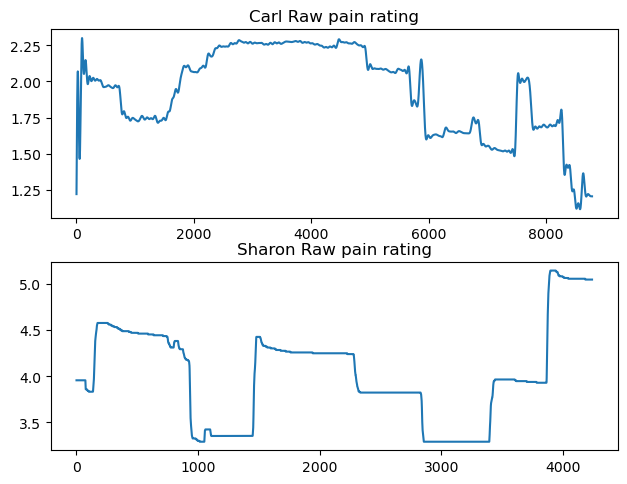

In [319]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout()
plt.subplot(2, 1, 1)
plt.plot(Carl_all_rating[4])
plt.title("Carl Raw pain rating")
plt.subplot(2, 1, 2)
plt.plot(Sharon_all_rating[0])
plt.title("Sharon Raw pain rating")
plt.show()

### normalize rating and try PAA and SAX

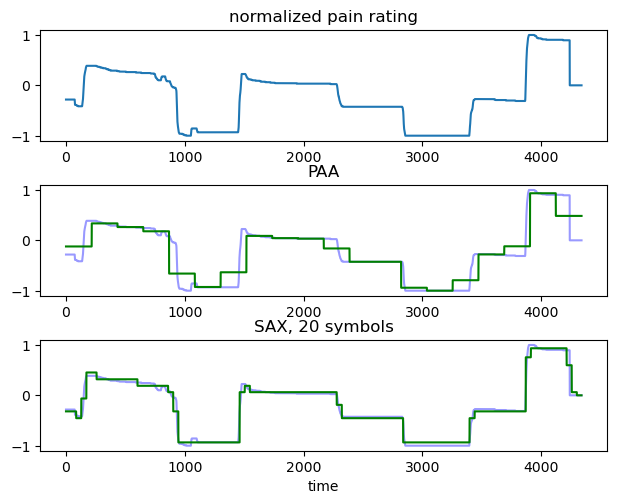

In [320]:
rating=Sharon_all_rating[0]
rating_norm = (rating-np.min(rating))/(np.max(rating)-np.min(rating))
rating_norm=np.array(rating_norm)*2-1
rating_norm=rating_norm.tolist()+[0]*100
# PAA transform (and inverse transform) of the data
rating=add_dim(rating_norm)
n_paa_segments = 20
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(rating))
# SAX transform
n_paa_segments = 100
n_sax_symbols = 20
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(rating))
fig, ax = plt.subplots(3, 1)
fig.tight_layout()
plt.subplot(3,1,1)
plt.plot(rating_norm)
plt.title("normalized pain rating")
# plt.xlabel("time")
plt.subplot(3,1,2)
plt.plot(rating[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "g-")
plt.title("PAA")
# plt.xlabel("time")
plt.subplot(3,1,3)
plt.plot(rating[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "g-")
plt.title("SAX, %d symbols" % n_sax_symbols)
plt.xlabel("time")
plt.show()

### glue two rating together

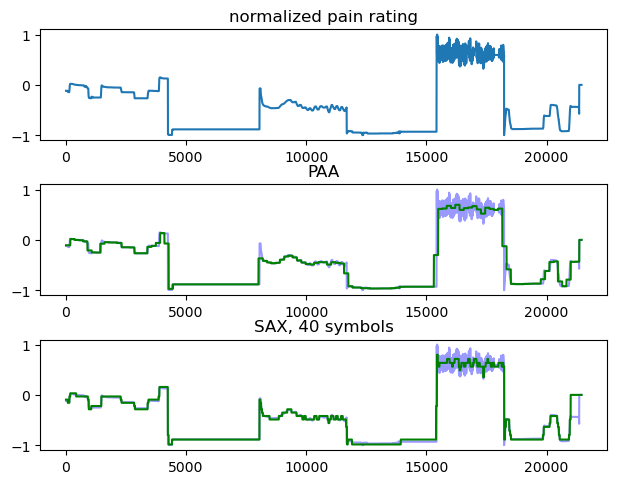

In [321]:
rating=Sharon_all_rating[0]+Sharon_all_rating[5]+Sharon_all_rating[10]+Sharon_all_rating[20]+Sharon_all_rating[40]+Sharon_all_rating[80]
rating_norm = (rating-np.min(rating))/(np.max(rating)-np.min(rating))
rating_norm=np.array(rating_norm)*2-1
rating_norm=rating_norm.tolist()+[0]*100
# PAA transform (and inverse transform) of the data
rating=add_dim(rating_norm)
n_paa_segments = 120
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(rating))
# SAX transform
n_paa_segments = 600
n_sax_symbols = 40
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(rating))
fig, ax = plt.subplots(3, 1)
fig.tight_layout()
plt.subplot(3,1,1)
plt.plot(rating_norm)
plt.title("normalized pain rating")
plt.subplot(3,1,2)
plt.plot(rating[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "g-")
plt.title("PAA")
plt.subplot(3,1,3)
plt.plot(rating[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "g-")
plt.title("SAX, %d symbols" % n_sax_symbols)
plt.show()

In [322]:
def glue_data(data_set):
    whole_data=[]
    num_list=[]
    for part in data_set:
        num_part=[]
        for list in part:
            num_part.append(len(list))
            whole_data.extend(list)
        num_list.append(num_part)
    return whole_data,num_list
def divide_data(whole_data,num_list):
    pointer=0
    part_rating_list=[]
    for part in num_list:
        part_rating=[]
        for num in part:
            part_rating.append(whole_data[pointer:pointer+num])
            pointer+=num
        part_rating_list.append(part_rating)
    return part_rating_list
def rating_normal_zeropad(rating):
    rating_norm = (rating-np.min(rating))/(np.max(rating)-np.min(rating))
    rating_norm_11=np.array(rating_norm)*2-1
    rating_zeropad=rating_norm_11.tolist()+[0]*100
    return rating_zeropad

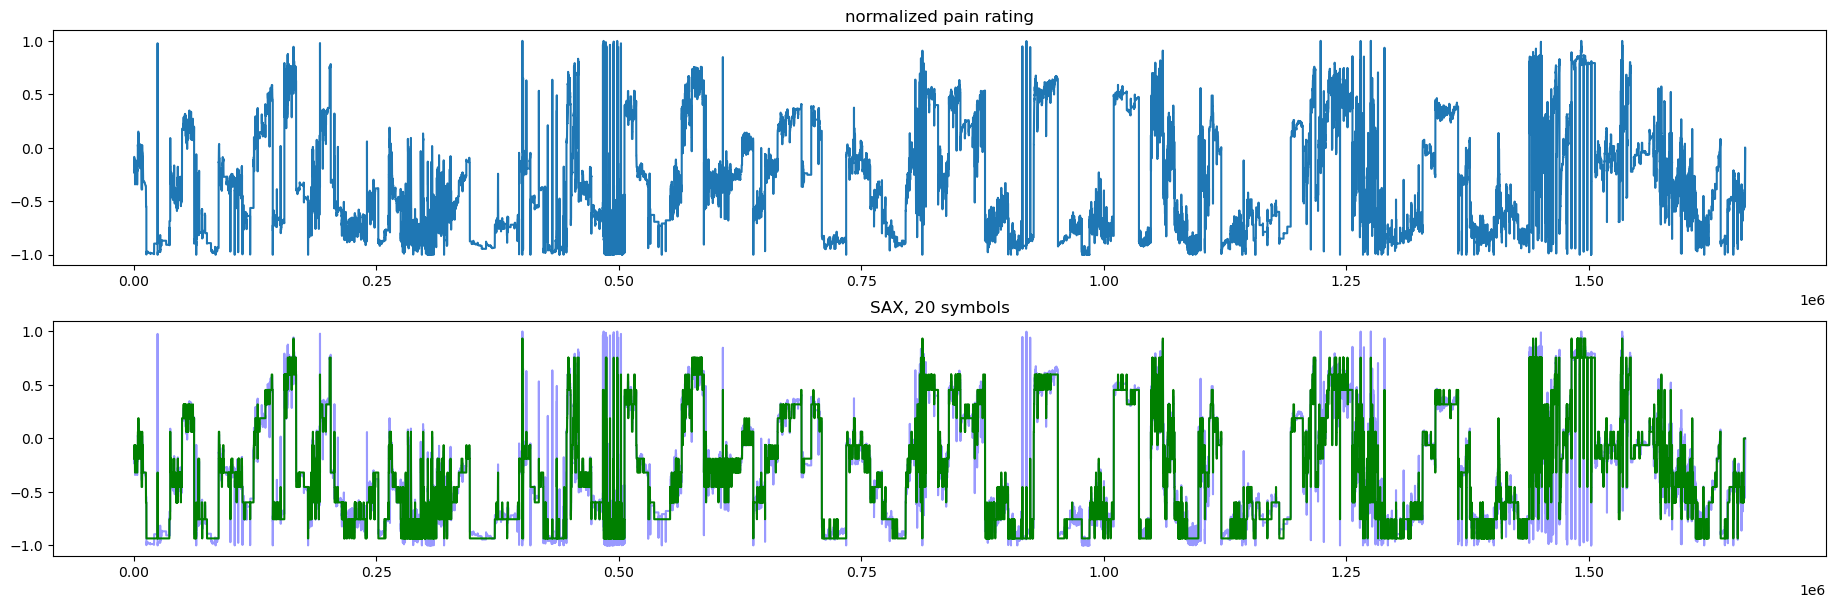

In [331]:
Whole_rating,num_list=glue_data(Sharon_rating_partcipant)
Whole_rating_normzero=rating_normal_zeropad(Whole_rating)
Whole_rating_adddim=add_dim(Whole_rating_normzero)
# SAX transform
n_paa_segments = 100*(len(Whole_rating_normzero)//4000)
n_sax_symbols = 20
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(Whole_rating_adddim))
fig, ax = plt.subplots(2, 1)
fig.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(20)
# plt.figure(figsize=(11, 6))
plt.subplot(2,1,1)
plt.plot(Whole_rating_normzero)
plt.title("normalized pain rating")
plt.subplot(2,1,2)
plt.plot(Whole_rating_normzero, "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "g-")
plt.title("SAX, %d symbols" % n_sax_symbols)
plt.show()

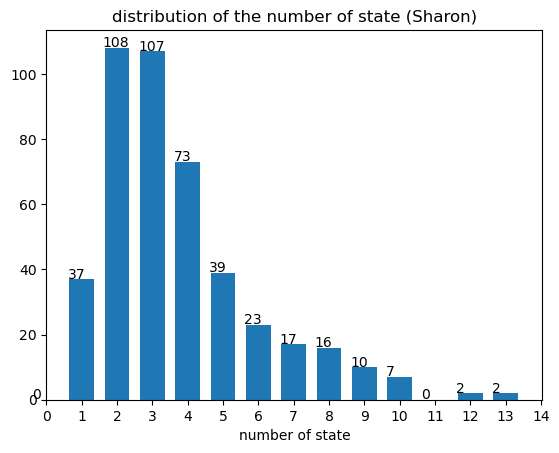

In [332]:
Sharon_SAX_part=divide_data(sax_dataset_inv[0].ravel().tolist(),num_list)
Sharon_SAX_All = [item for part in Sharon_SAX_part for item in part]
num_scale_list=[]
for sax_rating in Sharon_SAX_All:
    num_scale_list.append(len(Counter(sax_rating)))
bins = np.arange(0, max(num_scale_list) + 1.5) - 0.5
_, _, bars =plt.hist(num_scale_list,bins,rwidth=0.7)
plt.xlabel("number of state")
plt.xlim(left=0)
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
for pp in bars:
   x = (pp._x0 + pp._x1)/2-0.4
   y = pp._y1 + 0.2
   plt.text(x, y, int(pp._y1))
plt.title("distribution of the number of state (Sharon)")
plt.show()

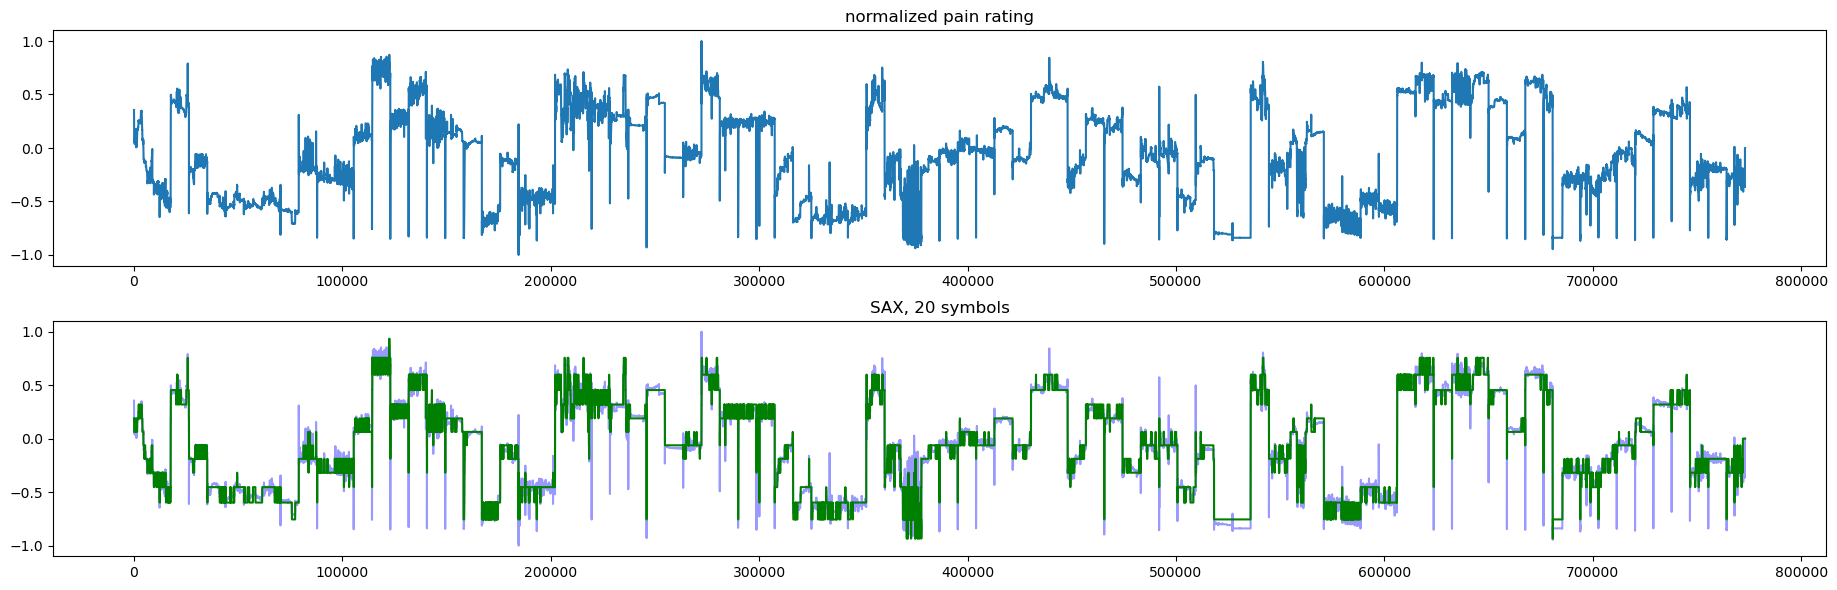

In [329]:
Whole_rating,num_list=glue_data(Carl_rating_partcipant)
Whole_rating_normzero=rating_normal_zeropad(Whole_rating)
Whole_rating_adddim=add_dim(Whole_rating_normzero)
# SAX transform
n_paa_segments = 100*(len(Whole_rating_normzero)//4000)
n_sax_symbols = 20
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(Whole_rating_adddim))
fig, ax = plt.subplots(2, 1)
fig.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(20)
# plt.figure(figsize=(11, 6))
plt.subplot(2,1,1)
plt.plot(Whole_rating_normzero)
plt.title("normalized pain rating")
plt.subplot(2,1,2)
plt.plot(Whole_rating_normzero, "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "g-")
plt.title("SAX, %d symbols" % n_sax_symbols)
plt.show()

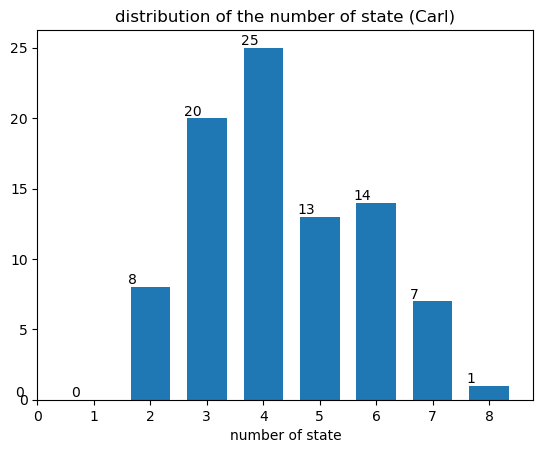

In [330]:
Carl_SAX_part=divide_data(sax_dataset_inv[0].ravel().tolist(),num_list)
Carl_SAX_All = [item for part in Carl_SAX_part for item in part]
num_scale_list=[]
for sax_rating in Carl_SAX_All:
    num_scale_list.append(len(Counter(sax_rating)))
bins = np.arange(0, max(num_scale_list) + 1.5) - 0.5
_, _, bars =plt.hist(num_scale_list,bins,rwidth=0.7)
plt.xlabel("number of state")
plt.xlim(left=0)
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
for pp in bars:
   x = (pp._x0 + pp._x1)/2-0.4
   y = pp._y1 + 0.2
   plt.text(x, y, int(pp._y1))
plt.title("distribution of the number of state (Carl)")
plt.show()

In [334]:
Sharon_SAX_all_df=pd.DataFrame({
    "Sharon_SAX_all":Sharon_SAX_All
})
Sharon_SAX_part_df=pd.DataFrame({
    "Sharon_SAX_part":Sharon_SAX_part
})
Carl_SAX_all_df=pd.DataFrame({
    "Carl_SAX_all":Carl_SAX_All
})
Carl_SAX_part_df=pd.DataFrame({
    "Carl_SAX_part":Carl_SAX_part
})
Sharon_SAX_all_df.to_pickle("../data/dataset/Sharon_SAX_all.pkl")
Sharon_SAX_part_df.to_pickle("../data/dataset/Sharon_SAX_part.pkl")
Carl_SAX_all_df.to_pickle("../data/dataset/Carl_SAX_all.pkl")
Carl_SAX_part_df.to_pickle("../data/dataset/Carl_SAX_part.pkl")